In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1.    Télécharger les deux fichiers CSV dans votre espace de travail.
2.   Charger les deux fichiers dans des dataframes et afficher leurs contenus. Nommez les dataframes 
marketing et ca.

In [7]:
marketing = pd.read_csv('marketing.csv')
display(marketing)

ca = pd.read_csv('CA.csv')
display(ca)

,Date,Marketing Spend,Promo
0,22/12/2020,1024.500000,Promotion Red
1,23/12/2020,1181.700000,Promotion Blue
2,24/12/2020,1955.000000,No Promo
3,25/12/2020,2336.777778,Promotion Blue
4,26/12/2020,4535.375000,Promotion Blue
...,...,...,...
119,05/05/2021,1119.600000,No Promo
120,06/05/2021,2067.888889,Promotion Red
121,07/05/2021,1450.200000,No Promo
122,08/05/2021,1121.875000,No Promo


,Date,Day_Name,Visitors,Revenue
0,09/11/2020,Monday,707,5211
1,10/11/2020,Tuesday,1455,10386
2,11/11/2020,Wednesday,1520,12475
3,12/11/2020,Thursday,1726,14414
4,13/11/2020,Friday,2134,20916
...,...,...,...,...
114,03/03/2021,Wednesday,1068,8223
115,04/03/2021,Thursday,1976,16727
116,05/03/2021,Friday,1806,15474
117,06/03/2021,Saturday,1621,12850


3. Quelle est la dimension des deux dataframes.

In [8]:
dim_marketing = marketing.shape
dim_ca = ca.shape
display('Dimension marketing',dim_marketing,'Dimension CA', dim_ca)

'Dimension marketing'

(124, 3)

'Dimension CA'

(119, 4)

4.   Fusionner les données afin d’avoir toutes les observations de la table du chiffre d’affaire et les dépenses marketing correspondantes. Nommez le dataframe df.

In [9]:
df= pd.merge(marketing, ca,how='left', on='Date')# this is to get all the marketing data with CA data where available and non available too. 
display(df)

,Date,Marketing Spend,Promo,Day_Name,Visitors,Revenue
0,22/12/2020,1024.500000,Promotion Red,Tuesday,1571.0,10245.0
1,23/12/2020,1181.700000,Promotion Blue,Wednesday,1288.0,11817.0
2,24/12/2020,1955.000000,No Promo,Thursday,2556.0,19550.0
3,25/12/2020,2336.777778,Promotion Blue,Friday,2152.0,21031.0
4,26/12/2020,4535.375000,Promotion Blue,Saturday,2678.0,36283.0
...,...,...,...,...,...,...
119,05/05/2021,1119.600000,No Promo,NaN,NaN,NaN
120,06/05/2021,2067.888889,Promotion Red,NaN,NaN,NaN
121,07/05/2021,1450.200000,No Promo,NaN,NaN,NaN
122,08/05/2021,1121.875000,No Promo,NaN,NaN,NaN


5.   Faites un nettoyage des données si nécessaire en imputant les cases manquantes par une valeur par défaut selon leurs types.

In [ ]:
# df.isnull().sum()  check the count of the missing values in each column
#df['Revenue'].fillna(df['Revenue'].mean(), inplace=True) filled the revenue missing values with the mean of the column
# df['Visitors'].fillna(df['Visitors'].mean(), inplace=True) filled the visitors missing values with the mean of the column
# df['Day_Name'].mode()[0]   this is to get the first most frequent value in the Day_Name column 
# df['Day_Name'].fillna(df['Day_Name'].mode()[0], inplace=True) filled the missing values of Day_Name with the most frequent value

df

,Date,Marketing Spend,Promo,Day,Visitors,Revenue
0,2020-12-22,1024.500000,Promotion Red,Tuesday,1571.00,10245.000000
1,2020-12-23,1181.700000,Promotion Blue,Wednesday,1288.00,11817.000000
2,2020-12-24,1955.000000,No Promo,Thursday,2556.00,19550.000000
3,2020-12-25,2336.777778,Promotion Blue,Friday,2152.00,21031.000000
4,2020-12-26,4535.375000,Promotion Blue,Saturday,2678.00,36283.000000
...,...,...,...,...,...,...
119,2021-05-05,1119.600000,No Promo,Sunday,1635.75,12712.088235
120,2021-05-06,2067.888889,Promotion Red,Sunday,1635.75,12712.088235
121,2021-05-07,1450.200000,No Promo,Sunday,1635.75,12712.088235
122,2021-05-08,1121.875000,No Promo,Sunday,1635.75,12712.088235


6.   Vérifiez le type des données, et faites une transformation si nécessaire.

In [ ]:

# df['Date']= pd.to_datetime(df['Date']) Change Date column to datetime type
# df['Day_Name'] = df['Day_Name'].astype('string') Change Day_Name column to string type
# df['Promo'] = df['Promo'].astype('string') Change Promo column to string type
df.info()# getting the final info of the dataframe after cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             124 non-null    datetime64[ns]
 1   Marketing Spend  124 non-null    float64       
 2   Promo            124 non-null    string        
 3   Day_Name         124 non-null    string        
 4   Visitors         124 non-null    float64       
 5   Revenue          124 non-null    float64       
dtypes: datetime64[ns](1), float64(3), string(2)
memory usage: 5.9 KB


7.   Changer le nom de la case «Day_name» par «Day ».

In [ ]:

df.rename(columns={'Day_Name': 'Day'}, inplace=True)  # renaming the data frame column Day_Name to Day and changes are made directly to the df itself. 

df

,Date,Marketing Spend,Promo,Day,Visitors,Revenue
0,2020-12-22,1024.500000,Promotion Red,Tuesday,1571.00,10245.000000
1,2020-12-23,1181.700000,Promotion Blue,Wednesday,1288.00,11817.000000
2,2020-12-24,1955.000000,No Promo,Thursday,2556.00,19550.000000
3,2020-12-25,2336.777778,Promotion Blue,Friday,2152.00,21031.000000
4,2020-12-26,4535.375000,Promotion Blue,Saturday,2678.00,36283.000000
...,...,...,...,...,...,...
119,2021-05-05,1119.600000,No Promo,Sunday,1635.75,12712.088235
120,2021-05-06,2067.888889,Promotion Red,Sunday,1635.75,12712.088235
121,2021-05-07,1450.200000,No Promo,Sunday,1635.75,12712.088235
122,2021-05-08,1121.875000,No Promo,Sunday,1635.75,12712.088235


8.   Extraire le mois à partir de la date.

In [ ]:
mois= df['Date'].dt.month # this gives the month part of the date column in numeric format and if i want to have it in words then i can use dt.month_name()
mois

0      12
1      12
2      12
3      12
4      12
       ..
119     5
120     5
121     5
122     5
123     5
Name: Date, Length: 124, dtype: int32

9.   Afficher les statistiques des variables numériques et commentez

In [ ]:
# df.info()  Only have Marketing Spend as float, Visitors and Revenue as float 
mkt_spend= df['Marketing Spend'].describe() # statistical summary of Marketing Spend column
mkt_spend

count     124.000000
mean     1366.431633
std       705.261299
min       322.000000
25%       854.863636
50%      1135.137500
75%      1673.950000
max      4535.375000
Name: Marketing Spend, dtype: float64

In [ ]:
visit= df['Visitors'].describe() # statistical summary of Visitors column
visit

count     124.000000
mean     1635.750000
std       423.610313
min       488.000000
25%      1479.000000
50%      1635.750000
75%      1635.750000
max      4139.000000
Name: Visitors, dtype: float64

In [ ]:
rev= df['Revenue'].describe() # statistical summary of Revenue column
rev

count      124.000000
mean     12712.088235
std       4939.858903
min       2898.000000
25%       9556.000000
50%      12712.088235
75%      12712.088235
max      36283.000000
Name: Revenue, dtype: float64

In [15]:
numeric_cols = ['Marketing Spend', 'Visitors', 'Revenue'] # selecting only numeric columns for correlation calculation
df[numeric_cols].corr() # correlation matrix for the numeric columns


,Marketing Spend,Visitors,Revenue
Marketing Spend,1.000000,0.826882,0.972807
Visitors,0.826882,1.000000,0.888705
Revenue,0.972807,0.888705,1.000000


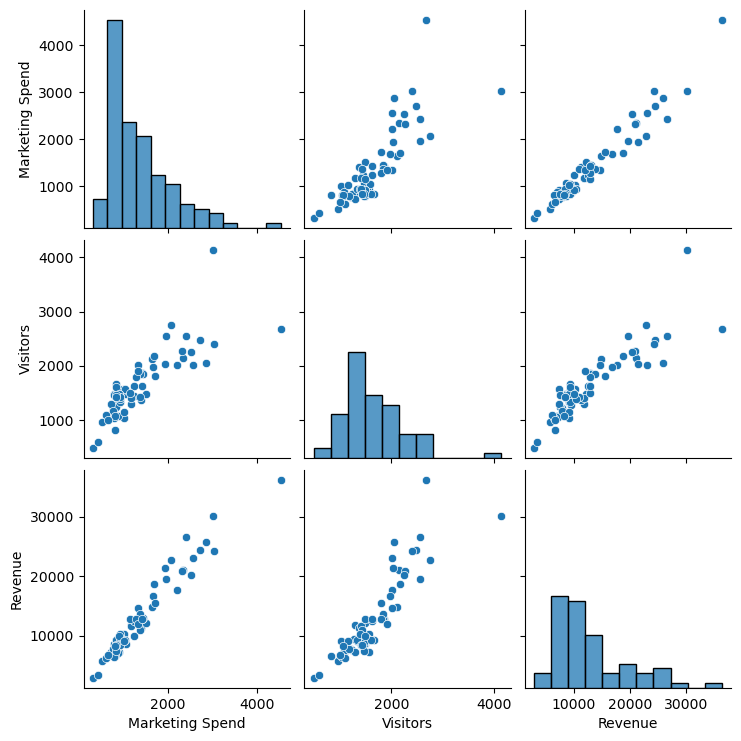

In [ ]:
# sns.pairplot(df, x_vars=['Marketing Spend', 'Visitors'], y_vars='Revenue', height=5, aspect=0.8, kind='scatter')
sns.pairplot(df[numeric_cols])

**L’analyse de corrélation montre une relation positive entre les dépenses marketing, le nombre de visiteurs et le chiffre d’affaires, ce dernier étant principalement influencé par le volume de visiteurs, lui-même stimulé par l’investissement marketing.**

10. Combien de type de promotion possède l’entreprise

In [21]:
df['Promo'].nunique() # this is to get the unique values in Promo column if i use nunique() it will give the total of unique values. 
# df.groupby(['Promo']).size() # this is to get the unique values in Promo column if i use nunique() it will give the total of unique values. 


3

11. Afficher les données où le jour est lundi et les dépenses marketing supérieures à 1200

In [ ]:
jour_filtered = df[(df['Day']=='Monday') & (df['Marketing Spend'] > 1200)] # filtering the data frame for only Monday and Marketing Spend greater than 1200
jour_filtered

,Date,Marketing Spend,Promo,Day,Visitors,Revenue
30,2021-01-25,1365.625,Promotion Blue,Monday,1430.0,10925.0


12. Afficher les données du meilleur chiffre d’affaire.

In [ ]:
best_revenue= df.loc[df['Revenue'].idxmax()] # localising the row with the maximum revenue value
best_revenue
# df['Revenue'].max()   This is to get the max value of the revenue itself which is 36283 for me in this case. 

Date               2020-12-26 00:00:00
Marketing Spend               4535.375
Promo                   Promotion Blue
Day                           Saturday
Visitors                        2678.0
Revenue                        36283.0
Name: 4, dtype: object

13. Afficher séparément : le chiffre d’affaire total, le minimum dans les dépenses marketing et la moyenne des visiteurs.

In [ ]:
total_revenue= df['Revenue'].sum() # total revenue across all entries

min_marketing= df['Marketing Spend'].min() # minimum marketing spend across all entries
    
avg_visitors= df['Visitors'].mean()# average visitors across all entries

display('Total Revenue:', total_revenue, 'Min Marketing Spend:', min_marketing, 'Average Visitors:', avg_visitors)
# np.float64(1576298.9411764713) is the Numpy representation of the total revenue 

'Total Revenue:'

np.float64(1576298.9411764713)

'Min Marketing Spend:'

322.0

'Average Visitors:'

np.float64(1635.75)

14. Quel est le mois où il y a le plus de visiteurs ?

In [ ]:
plus_visiteurs= df.loc[df['Visitors'].idxmax()] # localising the row with the maximum visitors value
plus_visiteurs.Date.month_name() # to get the month name of the date with maximum visitors
# Date               2021-01-07 00:00:00  Output needs to be the January 
# Marketing Spend                 3014.6
# Promo                         No Promo
# Day                           Thursday
# Visitors                        4139.0
# Revenue                        30146.0

'January'

15. Afficher par jour la moyenne du chiffre d’affaire, la moyenne des dépenses marketing et la moyenne des visiteurs.

In [ ]:
new_df = df.groupby('Day').agg({# here it groups the data by day and then calculates the average (mean) of Revenue, Marketing Spend, and Visitors for each day.
                            # agg stands for aggregate. 
    'Revenue': 'mean',   # By default, groupby() makes Day the index
    'Marketing Spend': 'mean',
    'Visitors': 'mean'
}).reset_index()#Turns Day back into a regular column Makes the dataframe easier to read and use
new_df

,Day,Revenue,Marketing Spend,Visitors
0,Friday,18744.125000,1966.003630,2033.875000
1,Monday,8960.500000,948.818182,1459.125000
2,Saturday,11992.000000,1374.784167,1411.000000
3,Sunday,12380.372256,1344.098930,1615.447761
4,Thursday,18254.800000,1949.639343,2288.700000
5,Tuesday,9427.090909,966.093480,1340.454545
6,Wednesday,11901.100000,1219.305631,1491.200000


16. Afficher la moyenne des variables de la question 13 par type de promotion

In [ ]:
moyen_par_rev_promo = df.groupby('Promo')['Revenue'].mean()  # calculating the avg by type de promotion 

moyen_par_visit_promo = df.groupby('Promo')['Visitors'].mean() # calculating the avg by type de promotion

moyen_par_mktSpend_promo = df.groupby('Promo')['Marketing Spend'].mean() # calculating the avg by type de promotion

display('moyen_par_rev_promo: ',moyen_par_rev_promo,'moyen_par_visit_promo :',  moyen_par_visit_promo,'Moyen par marketing spend :', moyen_par_mktSpend_promo)

'moyen_par_rev_promo: '

Promo
No Promo          11119.235871
Promotion Blue    15743.692437
Promotion Red     12057.596749
Name: Revenue, dtype: float64

'moyen_par_visit_promo :'

Promo
No Promo          1570.573529
Promotion Blue    1789.071429
Promotion Red     1582.006579
Name: Visitors, dtype: float64

'Moyen par marketing spend :'

Promo
No Promo          1093.127045
Promotion Blue    1884.626378
Promotion Red     1255.950525
Name: Marketing Spend, dtype: float64

17. Proposer les graphiques de votre choix qui peut fournir une vision pertinente du jeu de données.

<Axes: xlabel='Date'>

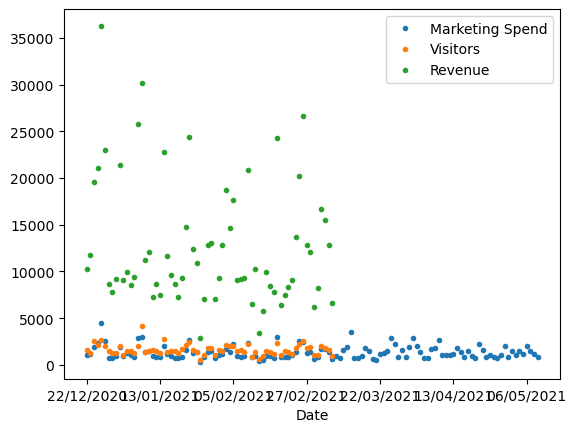

In [11]:
df.plot(x='Date', y=['Marketing Spend', 'Visitors', 'Revenue'], style='.')  # plotting the three columns against Date with dot style 


18. Retenir l’IA la plus performante qui permet de prédire les dépenses marketing